## COVID-19 Status using https://lab.isaaclin.cn/nCoV API

### github: https://github.com/BlankerL/DXY-COVID-19-Crawler

In [1]:
def getCountry(english_name): 
    for key, value in country_name_map.items():
        if value == english_name:
            return key

def toString(lst):
    for elem in lst:
        print('-------------------')
        print(' - '.join(elem))

In [2]:
import requests
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from newscatcher import Newscatcher

ansa_news = Newscatcher('ansa.it')

column_selection = ['published', 'title', 'summary', 'link']
df = pd.DataFrame(ansa_news.news)[column_selection]
df_filtered = df.set_index('title').filter(regex='virus', axis = 0)
news_list = df_filtered.reset_index()
news_list = news_list.reindex(columns = column_selection)
news_list['published'] = pd.to_datetime(df['published'], format = '%a, %d %b %Y %H:%M:%S %z')
news_list = news_list.sort_values(by=['published'], ascending = False)
news_list['published'] = news_list['published'].dt.strftime('%Y-%m-%d %H:%M:%S')
news = news_list.values.tolist()


with open('country_mapping.json', 'r') as f:
    country_name_map = json.load(f)

#name of the country (other then China)
country_str = 'Italy'
country = getCountry(country_str)

get_country_detail = requests.get('https://lab.isaaclin.cn/nCoV/api/area?latest=0&province=' + country)
get_overall = requests.get('https://lab.isaaclin.cn/nCoV/api/overall?latest=0')


data_overall = get_overall.json()['results']
data_country = get_country_detail.json()['results']

column_list_country = ['updateTime',
              'continentEnglishName',
              'countryEnglishName',
              'provinceEnglishName',
              'currentConfirmedCount',
              'confirmedCount',
              'suspectedCount',
              'curedCount',
              'deadCount']

column_list_overall = [
              'updateTime',
              'currentConfirmedCount',
              'confirmedCount',
              'suspectedCount',
              'curedCount',
              'deadCount']

df = pd.DataFrame(data_country)[column_list_country]
df_overall = pd.DataFrame(data_overall)[column_list_overall]

In [3]:
df['updateTime'] = pd.to_datetime(df['updateTime'], unit='ms')
df_overall['updateTime'] = pd.to_datetime(df_overall['updateTime'], unit='ms')

In [4]:
groupby_columns = ['confirmedCount', 'curedCount', 'deadCount']
df_grouped = df.groupby([df['updateTime'].dt.date])[groupby_columns].max().reset_index()
df_grouped_overall = df_overall.groupby([df_overall['updateTime'].dt.date])[groupby_columns].max().reset_index()

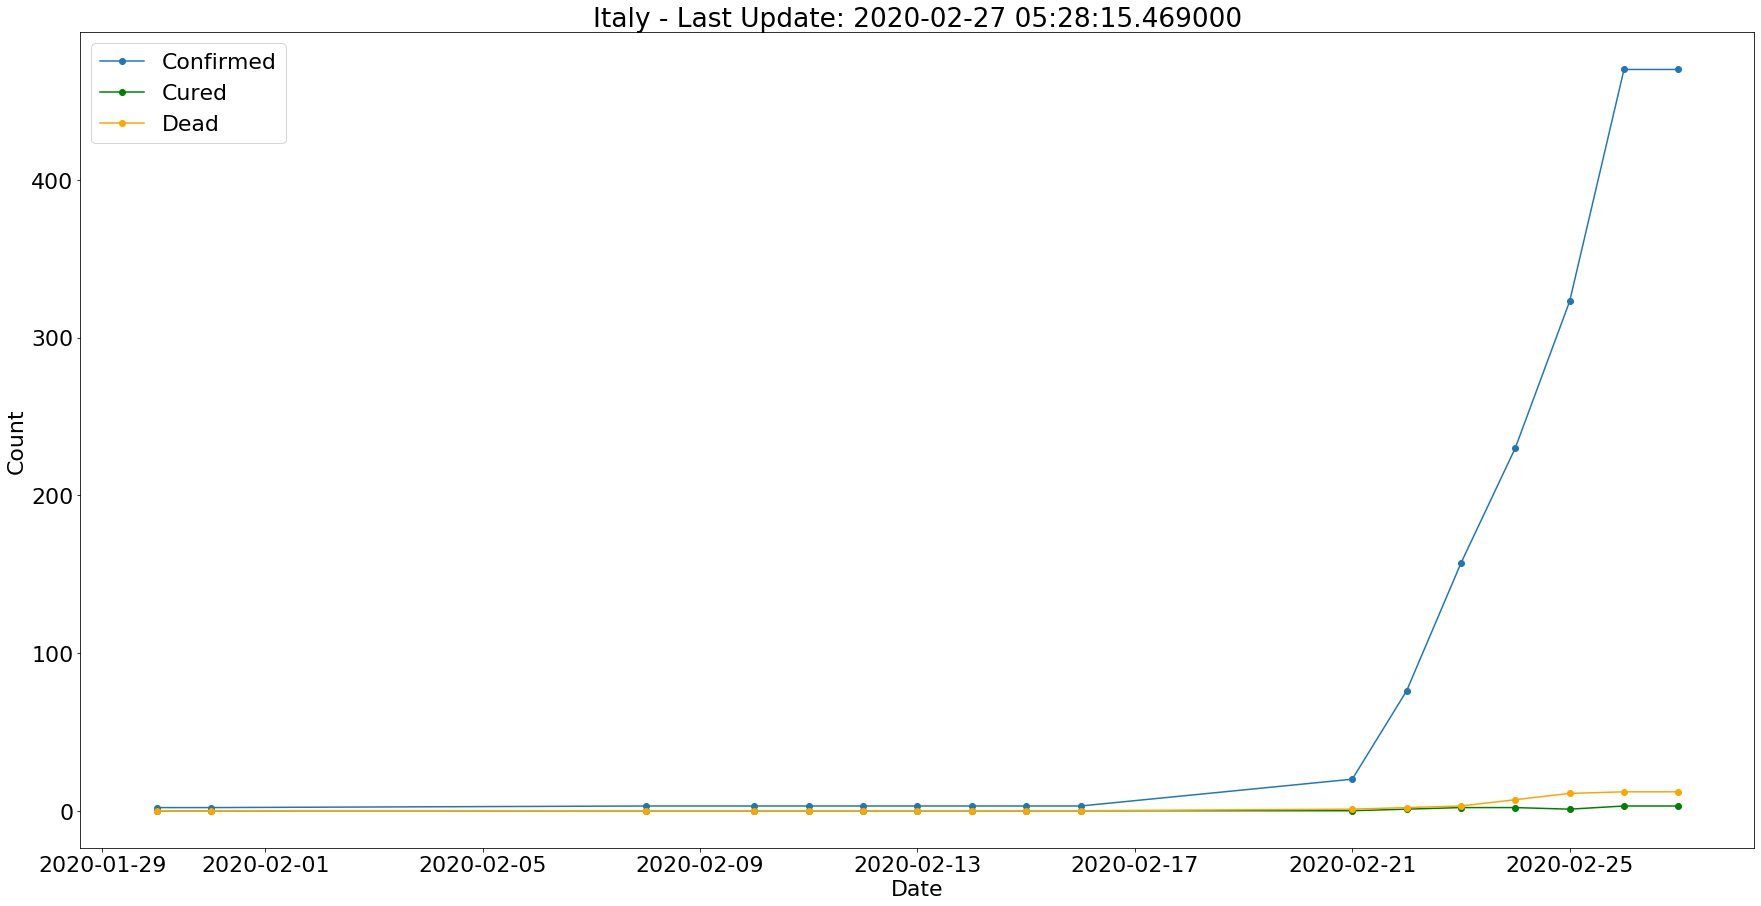

In [5]:
plt.rcParams['figure.figsize'] = [30, 15]

last_update = df.updateTime.max()

font = {'size': 22}

matplotlib.rc('font', **font)

fig,ax=plt.subplots()
ax.plot(df_grouped.updateTime, df_grouped.confirmedCount, marker= 'o', label = 'Confirmed')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title(country_str + ' - Last Update: ' + str(last_update))
ax.plot(df_grouped.updateTime, df_grouped.curedCount, marker= 'o', label = 'Cured', color = 'green')
ax.plot(df_grouped.updateTime, df_grouped.deadCount, marker= 'o', label = 'Dead', color = 'orange')

ax.legend(loc = 'upper left')


plt.show()

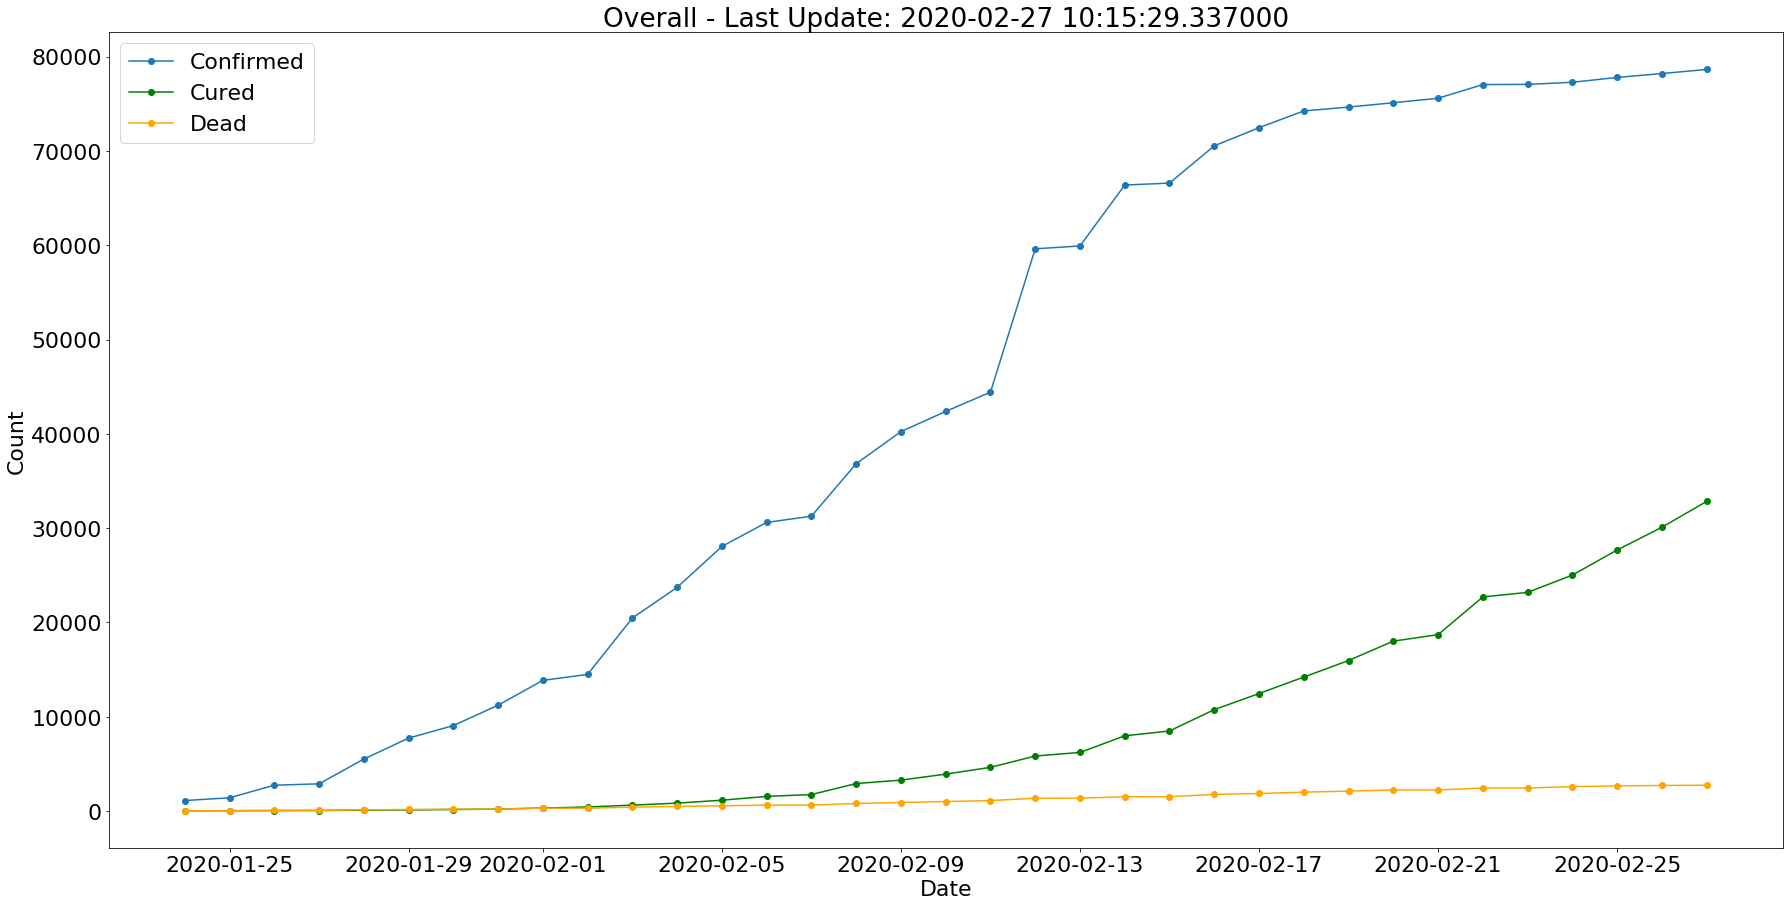

In [6]:
plt.rcParams['figure.figsize'] = [30, 15]

font = {'size': 22}

last_update = df_overall.updateTime.max()

matplotlib.rc('font', **font)

fig,ax=plt.subplots()
ax.plot(df_grouped_overall.updateTime, df_grouped_overall.confirmedCount, marker= 'o', label = 'Confirmed')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Overall - Last Update: ' + str(last_update))
ax.plot(df_grouped_overall.updateTime, df_grouped_overall.curedCount, marker= 'o', label = 'Cured', color = 'green')
ax.plot(df_grouped_overall.updateTime, df_grouped_overall.deadCount, marker= 'o', label = 'Dead', color = 'orange')

ax.legend(loc = 'upper left')


plt.show()

In [7]:
toString(news)

-------------------
2020-02-27 11:31:39 - Coronavirus, la conferenza stampa nella sede della Stampa Estera -  - http://www.ansa.it/sito/notizie/politica/2020/02/27/coronavirus-conferenza-stampa-di-di-maio-in-sede-stampa-estera-la-diretta_c29b4950-7356-439a-8d38-9df3b3eb1b47.html
-------------------
2020-02-27 11:30:47 - Coronavirus, Microsoft abbassa stime su ricavi - 'Su Windows e Surface un impatto più negativo del previsto' - http://www.ansa.it/sito/notizie/tecnologia/hitech/2020/02/27/virus-microsoft-abbassa-stime-su-ricavi_c6a75ca6-7ffb-41bd-b36b-a01cd63adc63.html
-------------------
2020-02-27 11:22:32 - Export:corsa a ostacoli tra dazi e virus - Sace Simest, ecco Mappa rischi, meglio in 67 Paesi, stabili 89 - http://www.ansa.it/sito/notizie/economia/2020/02/26/exportcorsa-a-ostacoli-tra-dazi-e-virus_9b1319fa-a78d-49a4-a16d-d063f21fc9b3.html
-------------------
2020-02-27 11:03:49 - Coronavirus: Msc, nessun caso a bordo - La nave è in navigazione verso Cozumel - http://www.ansa.i